**Cài đặt thư viện và import**
- pip install pandas
- pip install matplotlib
- pip install openpyxl
- pip install seaborn

In [127]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

## 1: Tiền xử lí dữ liệu
### Bước 1.1: Đọc Data và lập bảng tóm lược dữ liệu

In [128]:
# Lấy dữ liệu gốc từ IT Main
file_path = 'IT Main.xlsx'
df = pd.read_excel(file_path)

df

,Posted Date,Main Skill 1,Main Skill 2,Main Skill 3,Company,Workplace,Address,Company Type,Company Industry,Company Size,Country,Working Days,Overtime Policy
0,01/08/2024,NodeJS,Database,JavaScript,Unity Sport JSC,At office,Ho Chi Minh,IT Product,Sports and Fitness,1-50,Vietnam,Monday - Friday,Extra salary for OT
1,01/08/2024,Business Analyst,Database,NaN,Bluebik Vietnam,At office,Ha Noi,IT Outsourcing,IT Services and IT Consulting,1-50,Vietnam,Monday - Friday,Extra days off for OT
2,01/08/2024,Business Analyst,Project Manager,NaN,Hasaki,At office,Ho Chi Minh,Non-IT,Retail and Wholesale,1000+,Vietnam,Monday - Friday,No OT
3,01/08/2024,JavaScript,HTML5,TypeScript,LOVEPOP VIỆT NAM,Hybrid,Ho Chi Minh - Da Nang,IT Product,Consumer Goods,301-500,United States,Monday - Friday,No OT
4,01/08/2024,C++,Database,C#,VCTECK,Remote,Ho Chi Minh - Ha Noi,IT Product,Software Products and Web Services,1-50,Vietnam,Monday - Friday,No OT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,31/08/2024,UI-UX,Team Leader,Product Designer,AROBID.COM,Hybrid,At office,IT Product,E-commerce,51-150,Vietnam,Monday - Saturday,No OT
1938,31/08/2024,Python,AngularJS,ReactJS,Synopsys Viet Nam,Hybrid,Fresher Accepted,IT Service and IT Consulting,IT Services and IT Consulting,501-1000,United States,Monday - Friday,No OT
1939,31/08/2024,Salesforce,JSON,Cloud,Eyepax IT Consulting Company Limited,Hybrid,Ho Chi Minh,IT Service and IT Consulting,IT Services and IT Consulting,151-300,Singapore,Monday - Friday,No OT
1940,31/08/2024,Business Analyst,UI-UX,English,DNSE,Hybrid,Ho Chi Minh,IT Product,Financial Services,151-300,Vietnam,Monday - Friday,No OT


In [129]:
# Các hàm
def least_frequent(series):
    freq = series.dropna().value_counts()
    if not freq.empty:
        return freq.idxmin()    
    return None

def summary(df):
    summary = pd.DataFrame({
        'Count (Non-Null)': df.count(),
        'Unique': df.nunique(),
        'Mode (Most Frequent)': df.apply(lambda col: col.mode().iloc[0] if not col.mode().empty else None),
        'Min (Least Frequent)': df.apply(least_frequent),
        'Null Count': df.isnull().sum()
    })    
    return summary

def summary_numeric_column(df):
    stats = {}
    
    for column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            continue
        
        count = df[column].count()
        min_val = df[column].min()
        max_val = df[column].max()
        mean_val = df[column].mean()
        median_val = df[column].median()
        mode_val = df[column].mode().iloc[0] if not df[column].mode().empty else None
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.5)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        variance = df[column].var()
        stddev = df[column].std()
        
        stats[column] = {
            'Count': count,
            'Min': min_val,
            'Max': max_val,
            'Mean': mean_val,
            'Median': median_val,
            'Mode': mode_val,
            'Q1': q1,
            'Q2 (Median)': q2,
            'Q3': q3,
            'IQR': iqr,
            'Variance': variance,
            'StdDev': stddev,
        }

    stats_df = pd.DataFrame(stats)
    return stats_df

def drop_column(column, df):
    df_without_column = df.drop(column, axis=1)
    return df_without_column

def get_df_analysis():
    df_analysis = drop_column('Posted Date', df)
    df_analysis = drop_column('Main Skill 1', df_analysis)
    df_analysis = drop_column('Main Skill 2', df_analysis)
    df_analysis = drop_column('Main Skill 3', df_analysis)
    return df_analysis

def process_address(address):
    parts = address.split(" - ")
    for part in parts:
        if part != "Others":
            return part
    return "Others"

def frequency(column):
    counts = df[column].value_counts().sort_values(ascending=False)
    result = pd.DataFrame({column: counts.index, 'Count': counts.values})
    return result

def is_occupation(skill):
    for keyword in occupation_keywords: # type: ignore
        if pd.notnull(skill) and keyword.lower() in skill.lower():
            return True
    return False

def calculate_value(g_value):
    if g_value == '1000+':
        return 1000
    try:
        part1 = g_value.split('-')[0]
        part2 = g_value.split('-')[1]

        value1 = int(part1)
        value2 = int(part2)
        
        return int((value1 + value2) / 2)
    
    except Exception as e:
        return 'N/A'

In [130]:
df_analysis = get_df_analysis()
summary(df_analysis)

,Count (Non-Null),Unique,Mode (Most Frequent),Min (Least Frequent),Null Count
Company,1942,685,ABBANK,Saishunkan System Vietnam,0
Workplace,1942,18,At office,Da Nang - Others,0
Address,1942,25,Ho Chi Minh,Others - Ha Noi,0
Company Type,1942,5,IT Product,Headhunt,0
Company Industry,1861,33,IT Services and IT Consulting,Consumer Goods,81
Company Size,1942,7,51-150,501-1000,0
Country,1942,30,Vietnam,Philippines,0
Working Days,1942,2,Monday - Friday,Monday - Saturday,0
Overtime Policy,1716,4,No OT,OT included in base salary,226


### Bước 1.2: Xử lý giá trị Null

In [131]:
# Tần suất của các cột null
frequency('Company Industry').head()

,Company Industry,Count
0,IT Services and IT Consulting,540
1,Software Products and Web Services,318
2,Banking,208
3,Financial Services,185
4,Software Development Outsourcing,183


In [132]:
frequency('Overtime Policy')

,Overtime Policy,Count
0,No OT,1453
1,Extra salary for OT,230
2,Extra days off for OT,31
3,OT included in base salary,2


In [133]:
# Điền các giá trị khuyết bằng top 5 các giá trị có tần suất lớn nhất cho cột Company Industry
top_industry_values = df['Company Industry'].value_counts().head(5).index.tolist()

null_indices = df[df['Company Industry'].isnull()].index
for i, idx in enumerate(null_indices):
    df.at[idx, 'Company Industry'] = top_industry_values[i % len(top_industry_values)]

In [134]:
# Điền các giá trị khuyết của cột Overtime Policy bằng giá trị Mode của cột này
top_overtime_policy_value = df['Overtime Policy'].mode()[0]

df['Overtime Policy'].fillna(top_overtime_policy_value, inplace=True)

In [135]:
df_analysis = get_df_analysis()
summary(df_analysis)

,Count (Non-Null),Unique,Mode (Most Frequent),Min (Least Frequent),Null Count
Company,1942,685,ABBANK,Saishunkan System Vietnam,0
Workplace,1942,18,At office,Da Nang - Others,0
Address,1942,25,Ho Chi Minh,Others - Ha Noi,0
Company Type,1942,5,IT Product,Headhunt,0
Company Industry,1942,33,IT Services and IT Consulting,Consumer Goods,0
Company Size,1942,7,51-150,501-1000,0
Country,1942,30,Vietnam,Philippines,0
Working Days,1942,2,Monday - Friday,Monday - Saturday,0
Overtime Policy,1942,4,No OT,OT included in base salary,0


### Bước 1.3: Xử lý dữ liệu ngoại lai và dữ liệu lỗi

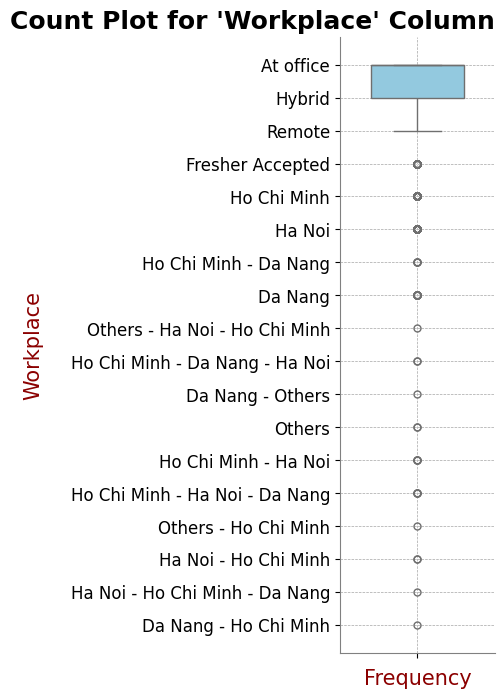

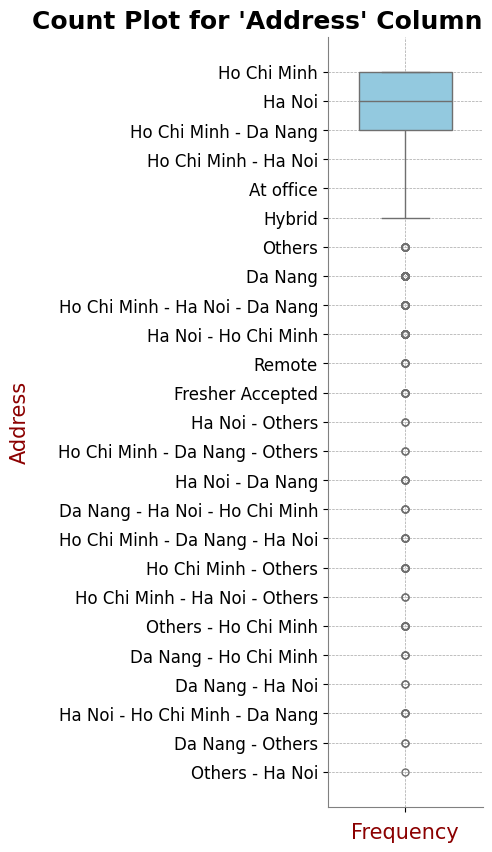

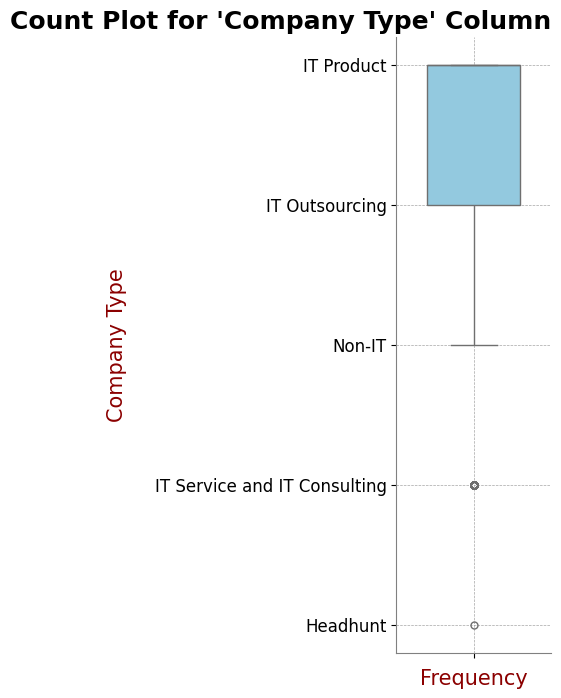

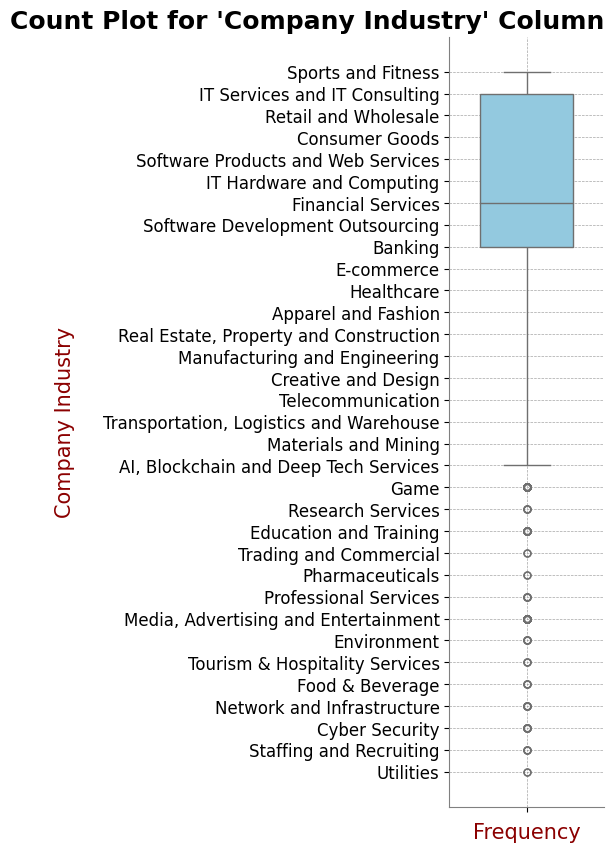

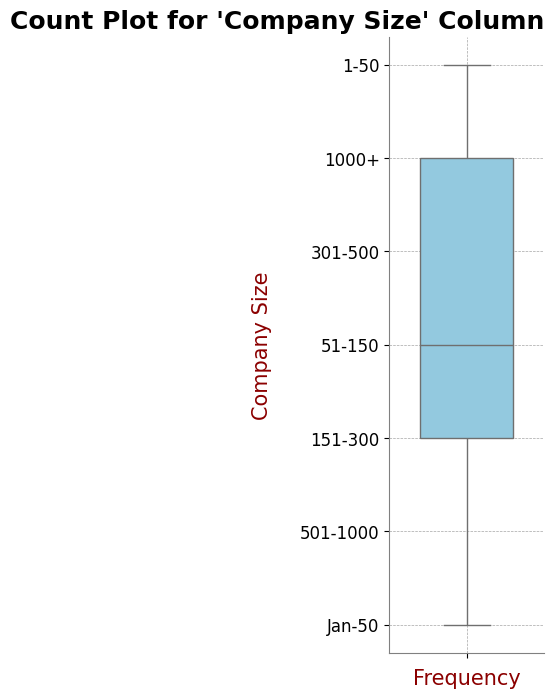

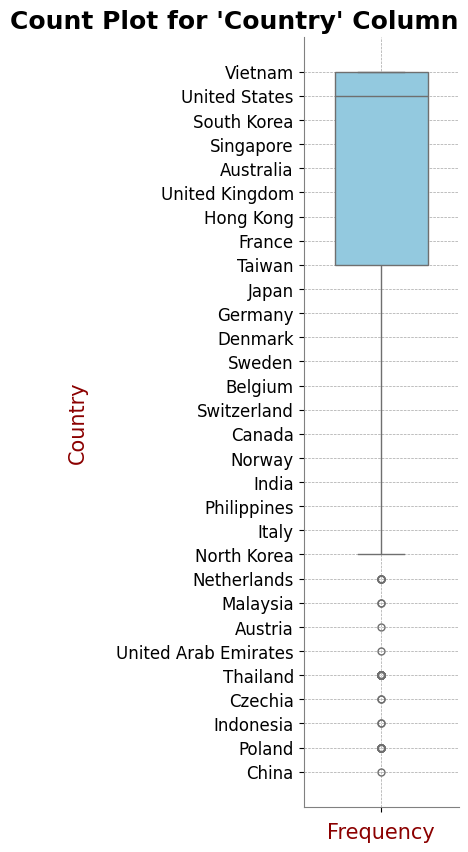

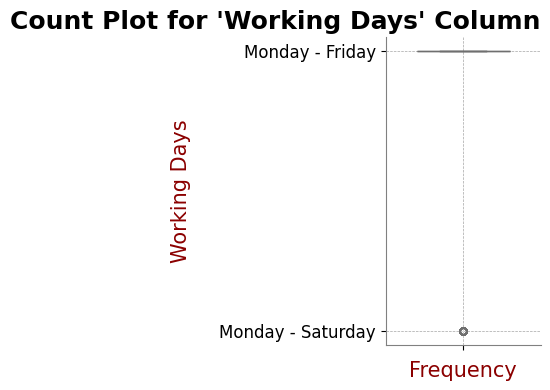

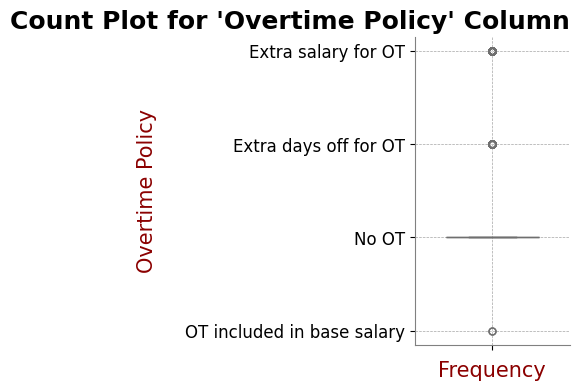

In [136]:
# Vẽ biểu đồ box cho các cột
df_analysis = get_df_analysis()
for column in df_analysis.columns:
    if column == 'Company':
        continue       
    elif column == 'Working Days' or column == 'Overtime Policy':
        plt.figure(figsize=(2, 4))
    elif column == 'Company Type' or column == 'Company Size' or column == 'Workplace':
        plt.figure(figsize=(2, 8))
    elif column == 'Company Industry' or column == 'Address' or column == 'Country':
        plt.figure(figsize=(2, 10))
    else:
        plt.figure(figsize=(4, 20))

    sns.boxplot(
        y=df[column],
        color="skyblue",
        width=0.6,
        fliersize=5
    )

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title(f"Count Plot for '{column}' Column", fontsize=18, color='black', weight='bold', loc='right')

    plt.ylabel(column, fontsize=15, color='darkred', labelpad=20)
    plt.xlabel('Frequency', fontsize=15, color='darkred')

    plt.yticks(fontsize=12, color='black')
    plt.xticks(fontsize=12, color='black')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')
    plt.show()

- Nhận thấy cột Company Type có giá trị Headhunt là outliner, vì Headhunt không phải một loại hình công ty, đổi giá trị thành Non-IT.
- Nhận thấy cột Workplace có các giá trị:
    + Ho Chi Minh
    + Ha Noi
    + Da Nang
    + Fresher Accepted
    + Ho Chi Minh - Da Nang
    + Ho Chi Minh - Ha Noi
    + Ho Chi Minh - Ha Noi - Da Nang
    + Ho Chi Minh - Da Nang - Ha Noi
    + Ha Noi - Ho Chi Minh
    + Da Nang - Ho Chi Minh
    + Others
    + Others - Ha Noi - Ho Chi Minh
    + Da Nang - Others
    + Ha Noi - Ho Chi Minh - Da Nang
    + Others - Ho Chi Minh <br>

  là outliner, vì chúng không là hình thức làm việc, vì vậy sẽ đổi giá trị thành giá trị Mode của cột này (At office).
- Nhận thấy cột Company Size có giá trị Jan-50 là giá trị lỗi, vì không cùng dạng với các giá trị còn lại, đổi giá trị thành 1-50
- Nhận thấy cột Address có các giá trị:
    + At office
    + Remote
    + Hybrid
    + Fresher Accepted <br>

  là outliner, vì chúng là hình thức làm việc, không phải địa chỉ, sẽ đổi thành Others. Những giá trị gồm nhiều địa điểm, sẽ ưu tiên lấy địa điểm đầu; với những giá trị có từ Others kèm một địa điểm, sẽ lấy địa điểm cụ thể đầu tiên

In [137]:
# Loại bỏ outliner cột Company Type
df.loc[df['Company Type'] == 'Headhunt', 'Company Type'] = 'Non-IT'
frequency('Company Type')

,Company Type,Count
0,IT Product,1225
1,IT Service and IT Consulting,351
2,IT Outsourcing,267
3,Non-IT,99


In [138]:
# Loại bỏ outliner cột Workplace
values_to_replace = [
    'Ho Chi Minh', 'Da Nang', 'Ha Noi', 'Others',
    'Fresher Accepted', 'Ho Chi Minh - Da Nang', 'Ho Chi Minh - Ha Noi',
    'Ho Chi Minh - Ha Noi - Da Nang', 'Ho Chi Minh - Da Nang - Ha Noi', 
    'Ha Noi - Ho Chi Minh', 'Da Nang - Ho Chi Minh', 'Others - Ha Noi - Ho Chi Minh', 
    'Da Nang - Others', 'Ha Noi - Ho Chi Minh - Da Nang', 'Others - Ho Chi Minh'
]

df.loc[df['Workplace'].isin(values_to_replace), 'Workplace'] = 'At office'
frequency('Workplace')

,Workplace,Count
0,At office,1529
1,Hybrid,373
2,Remote,40


In [139]:
# Loại bỏ giá trị lỗi cột Company Size
df.loc[df['Company Size'] == 'Jan-50', 'Company Size'] = '1-50'
frequency('Company Size')

,Company Size,Count
0,51-150,511
1,1000+,441
2,1-50,425
3,151-300,256
4,301-500,220
5,501-1000,89


In [140]:
# Loại bỏ giá trị ngoại lai cột Address
values_to_replace = ['At office', 'Hybrid', 'Remote', 'Fresher Accepted']

df.loc[df['Address'].isin(values_to_replace), 'Address'] = 'Others'

# Loại bỏ giá trị lỗi cột Address
df['Address'] = df['Address'].apply(process_address)
frequency('Address')

,Address,Count
0,Ho Chi Minh,1009
1,Ha Noi,581
2,Others,289
3,Da Nang,63


### Bước 1.5: Sinh cột mới

In [141]:
# Sinh cột tháng
df = df.copy()
df['Posted Date'] = pd.to_datetime(df['Posted Date'], dayfirst=True)
df['Month'] = df['Posted Date'].dt.month
df = df.loc[:, ['Posted Date', 'Month'] + [col for col in df.columns if col not in ['Posted Date', 'Month']]]

frequency('Month')

,Month,Count
0,8,1404
1,9,455
2,7,83


In [142]:
# Chuyển đổi cột Company Size về dạng số
df['Company Size'] = df['Company Size'].apply(calculate_value)

df

,Posted Date,Month,Main Skill 1,Main Skill 2,Main Skill 3,Company,Workplace,Address,Company Type,Company Industry,Company Size,Country,Working Days,Overtime Policy
0,2024-08-01,8,NodeJS,Database,JavaScript,Unity Sport JSC,At office,Ho Chi Minh,IT Product,Sports and Fitness,25,Vietnam,Monday - Friday,Extra salary for OT
1,2024-08-01,8,Business Analyst,Database,NaN,Bluebik Vietnam,At office,Ha Noi,IT Outsourcing,IT Services and IT Consulting,25,Vietnam,Monday - Friday,Extra days off for OT
2,2024-08-01,8,Business Analyst,Project Manager,NaN,Hasaki,At office,Ho Chi Minh,Non-IT,Retail and Wholesale,1000,Vietnam,Monday - Friday,No OT
3,2024-08-01,8,JavaScript,HTML5,TypeScript,LOVEPOP VIỆT NAM,Hybrid,Ho Chi Minh,IT Product,Consumer Goods,400,United States,Monday - Friday,No OT
4,2024-08-01,8,C++,Database,C#,VCTECK,Remote,Ho Chi Minh,IT Product,Software Products and Web Services,25,Vietnam,Monday - Friday,No OT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,2024-08-31,8,UI-UX,Team Leader,Product Designer,AROBID.COM,Hybrid,Others,IT Product,E-commerce,100,Vietnam,Monday - Saturday,No OT
1938,2024-08-31,8,Python,AngularJS,ReactJS,Synopsys Viet Nam,Hybrid,Others,IT Service and IT Consulting,IT Services and IT Consulting,750,United States,Monday - Friday,No OT
1939,2024-08-31,8,Salesforce,JSON,Cloud,Eyepax IT Consulting Company Limited,Hybrid,Ho Chi Minh,IT Service and IT Consulting,IT Services and IT Consulting,225,Singapore,Monday - Friday,No OT
1940,2024-08-31,8,Business Analyst,UI-UX,English,DNSE,Hybrid,Ho Chi Minh,IT Product,Financial Services,225,Vietnam,Monday - Friday,No OT


## 2: Phân tích mô tả
### Bước 2.1: Lập bảng tóm lược dữ liệu đã được tiền xử lý

In [143]:
# Mô tả tổng quan các cột
df_analysis = get_df_analysis()
summary(df_analysis)

,Count (Non-Null),Unique,Mode (Most Frequent),Min (Least Frequent),Null Count
Month,1942,3,8,7,0
Company,1942,685,ABBANK,Saishunkan System Vietnam,0
Workplace,1942,3,At office,Remote,0
Address,1942,4,Ho Chi Minh,Da Nang,0
Company Type,1942,4,IT Product,Non-IT,0
Company Industry,1942,33,IT Services and IT Consulting,Consumer Goods,0
Company Size,1942,6,100,750,0
Country,1942,30,Vietnam,Philippines,0
Working Days,1942,2,Monday - Friday,Monday - Saturday,0
Overtime Policy,1942,4,No OT,OT included in base salary,0


In [144]:
# Bảng mô tả các cột dạng số
df_numeric_column = summary_numeric_column(df)
df_numeric_column

,Month,Company Size
Count,1942.000000,1942.000000
Min,7.000000,25.000000
Max,9.000000,1000.000000
Mean,8.191555,368.215757
Median,8.000000,225.000000
Mode,8.000000,100.000000
Q1,8.000000,100.000000
Q2 (Median),8.000000,225.000000
Q3,8.000000,750.000000
IQR,0.000000,650.000000


In [162]:
# Lưu lại dataset đã tiền xử lý
df.to_excel('IT Main Preprocessed.xlsx', index=False, sheet_name='Data')

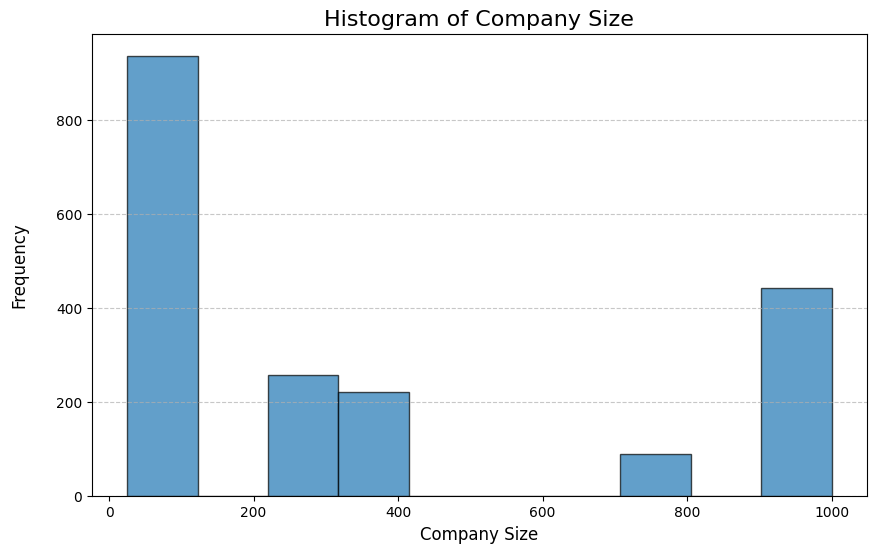

In [ ]:
# Vẽ biểu đồ Histogram cho cột Company Size
plt.figure(figsize=(10, 6))
plt.hist(df['Company Size'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
column = 'Country'
frequency(column)

,Country,Count
0,Vietnam,942
1,Japan,263
2,United States,165
3,Singapore,129
4,South Korea,83
5,Germany,59
6,United Kingdom,44
7,Australia,40
8,France,35
9,Switzerland,33


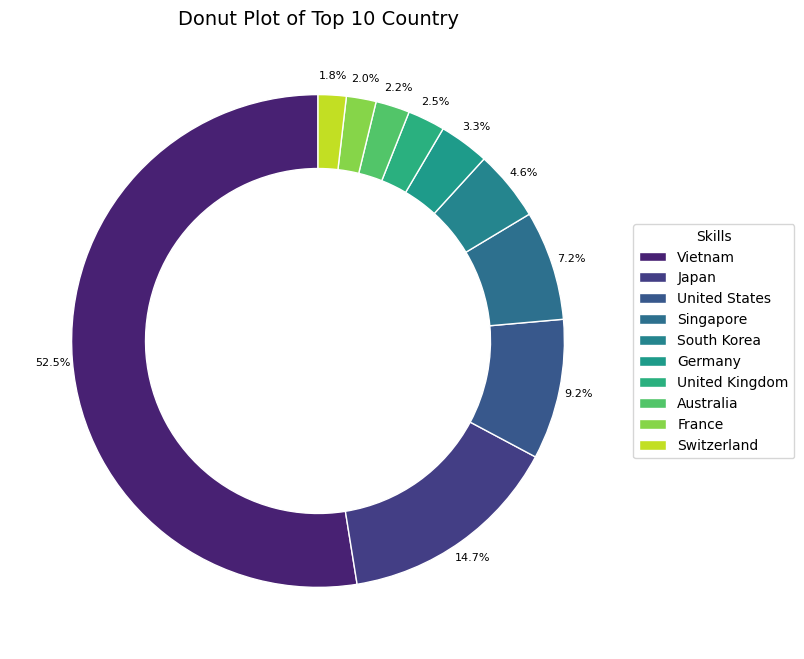

In [ ]:
# Vẽ Pie Chart
top_10 = df[column].value_counts().head(10).reset_index()
top_10.columns = [column, 'Count']
values = top_10['Count']
labels = top_10[column]

plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", len(labels))

wedges, texts, autotexts = plt.pie(
    values, labels=None, autopct='%1.1f%%', startangle=90, colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='white'), textprops=dict(color="black")
)

for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_fontsize(8)
    autotext.set_verticalalignment('center')
    x, y = autotext.get_position()
    autotext.set_position((1.8 * x, 1.8 * y))

plt.legend(wedges, labels, title="Skills", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Donut Plot of Top 10 Country", fontsize=14)
plt.show()

C:\Users\Needle Fung\AppData\Local\Temp\ipykernel_10716\4197603014.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y=column, x='Count', palette="viridis")


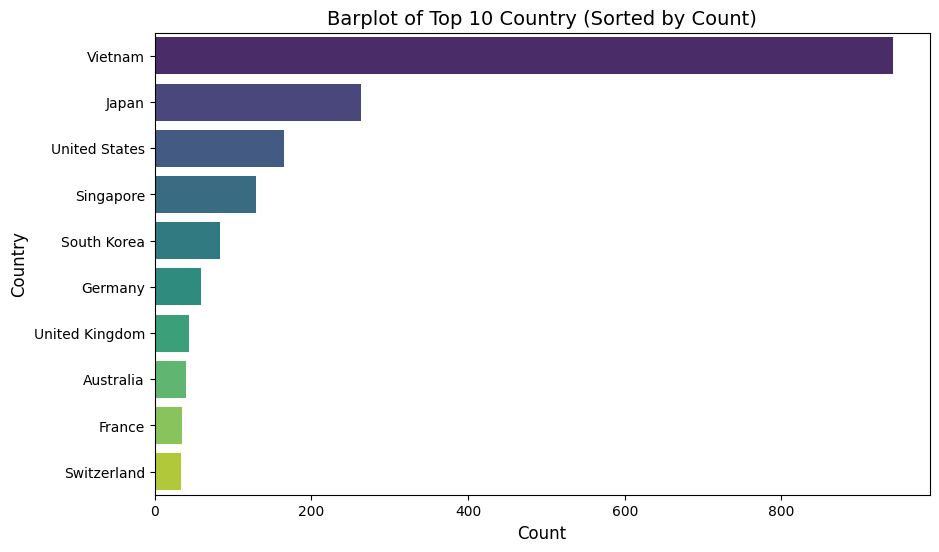

In [ ]:
top_10 = df[column].value_counts().head(10).reset_index()
top_10.columns = [column, 'Count']  # Rename the columns

top_10 = top_10.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y=column, x='Count', palette="viridis")

plt.title(f'Barplot of Top 10 {column} (Sorted by Count)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel(column, fontsize=12)

plt.show()


In [ ]:
column = 'Company Industry'
frequency(column).head(10)

,Company Industry,Count
0,IT Services and IT Consulting,557
1,Software Products and Web Services,334
2,Banking,224
3,Financial Services,201
4,Software Development Outsourcing,199
5,E-commerce,42
6,IT Hardware and Computing,39
7,"AI, Blockchain and Deep Tech Services",38
8,Game,32
9,Telecommunication,32


C:\Users\Needle Fung\AppData\Local\Temp\ipykernel_10716\687790396.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_values, y=column, x='Count', palette="viridis", hue=None, legend=False)


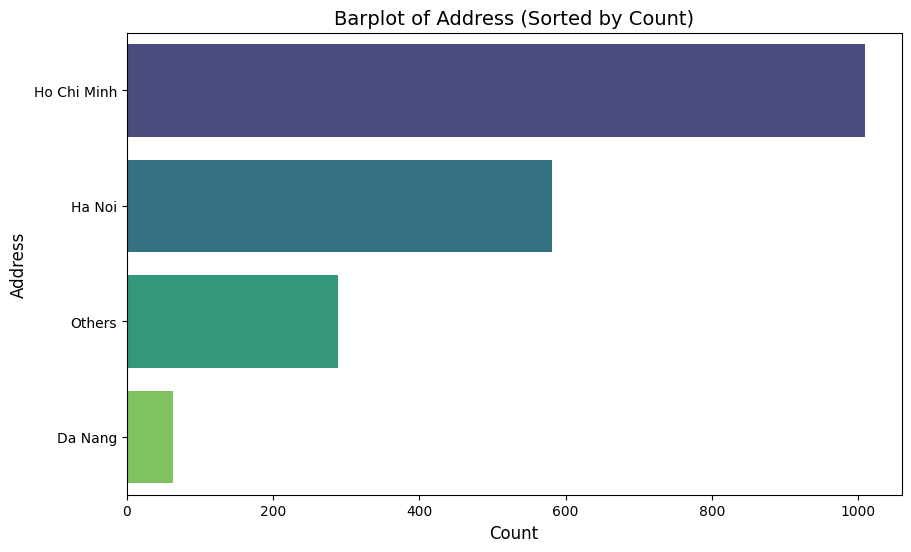

In [ ]:
value_counts = df[column].value_counts()

sorted_values = value_counts.reset_index()
sorted_values.columns = [column, 'Count']
sorted_values = sorted_values.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_values, y=column, x='Count', palette="viridis", hue=None, legend=False)

# Tùy chỉnh biểu đồ
plt.title(f'Barplot of {column} (Sorted by Count)', fontsize=14)
plt.ylabel(column, fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()


In [149]:
data = df.groupby(['Workplace', 'Company Type']).size().reset_index(name='Count')
pivot = data.pivot(index='Workplace', columns='Company Type', values='Count')

pivot.iloc[-1, -1] = 0
pivot

Company Type,IT Outsourcing,IT Product,IT Service and IT Consulting,Non-IT
Workplace,,,,
At office,199.0,973.0,262.0,95.0
Hybrid,62.0,221.0,86.0,4.0
Remote,6.0,31.0,3.0,0.0


<Figure size 40000x40000 with 0 Axes>

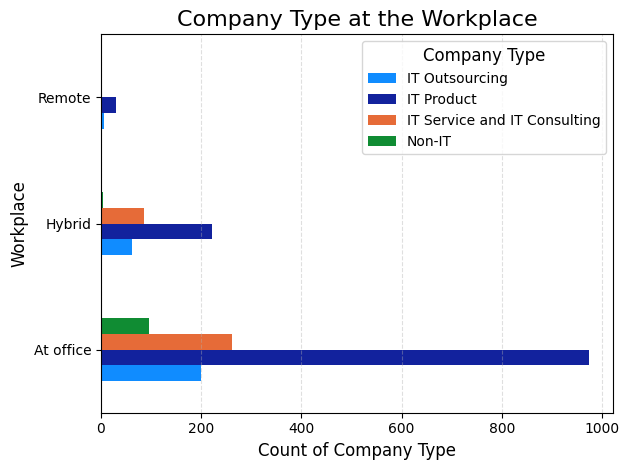

In [ ]:
# Vẽ biểu đồ tương quan giữa Company Type và Workplace
data = df.groupby(['Workplace', 'Company Type']).size().reset_index(name='Count')
pivot = data.pivot(index='Workplace', columns='Company Type', values='Count')

plt.figure(figsize=(400, 400))
pivot.plot(kind='barh', stacked=False, color=['#108cff', '#12229d', '#e66b38', '#108c33'], edgecolor='None')

plt.title('Company Type at the Workplace', fontsize=16)
plt.xlabel('Count of Company Type', fontsize=12)
plt.ylabel('Workplace', fontsize=12)
plt.legend(title='Company Type', fontsize=10, title_fontsize=12, loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


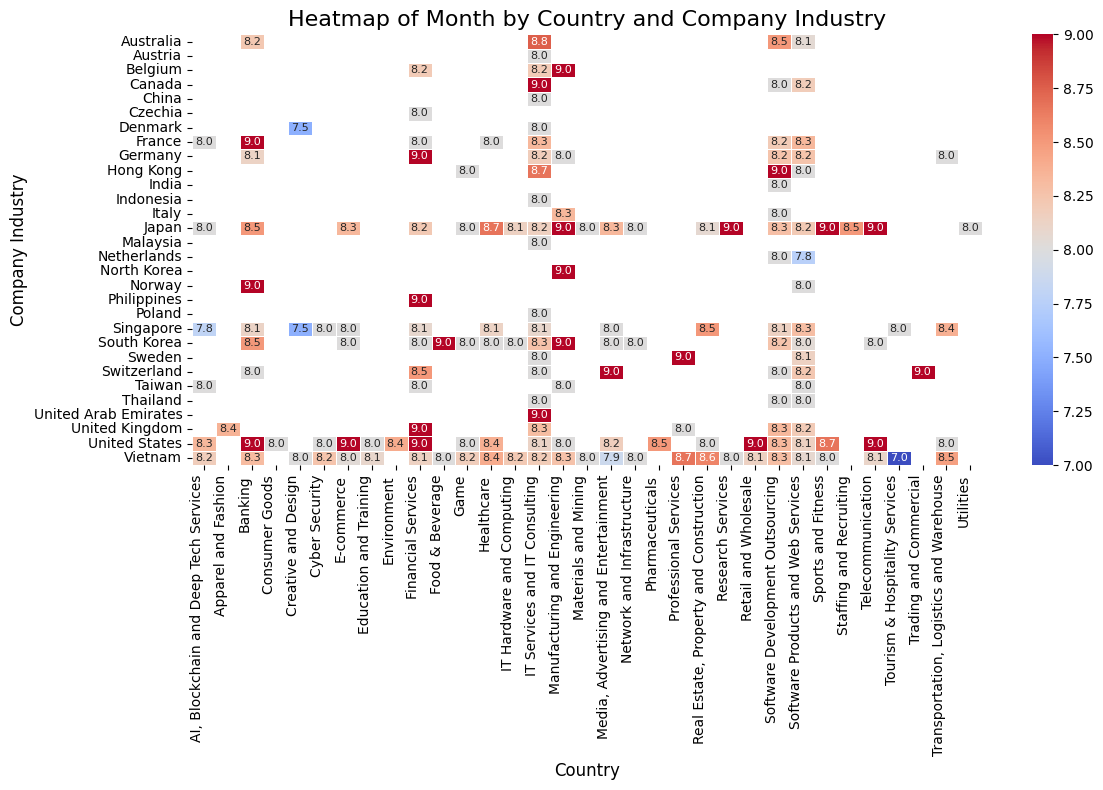

In [160]:
# Vẽ heatmap
col_y = 'Month'
col_x1, col_x2 = 'Country', 'Company Industry'

heatmap_data = df.groupby([col_x1, col_x2])[col_y].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5, annot_kws={"fontsize": 8} )

plt.title(f"Heatmap of {col_y} by {col_x1} and {col_x2}", fontsize=16)
plt.xlabel(col_x1, fontsize=12)
plt.ylabel(col_x2, fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()